# Quiz 3

You will have to upload your quiz to Canvas in the correct ipynb format within the 45 minute testing period. 

You may consult your notes, lecture material, homework assignments, discussion section material, ECH 60 jupyter notebook web site (https://hmanikantan.github.io/ECH60/), and Python Programming and Numerical Methods web site (https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). You must NOT consult any other sources. You should NOT seek help from anyone else for the duration of the quiz. And you should NOT share or discuss questions with other sections after your quiz. Any violation of these rules will be treated as academic misconduct and will be reported as such to the office of student support and judicial affairs.

Partial points will be awarded ONLY IF a reasonably accurate attempt has been made. 

Acknowledge abiding by these rules by writing a single line of code to print your name:

In [1]:
print('Devin Fan')

Devin Fan


Question 1. Forward time centered space (FTCS). Recall that the 1D heat equation can be described by the following PDE $\frac{\partial T}{\partial t} = D\frac{\partial^2 T}{\partial x^2}$. This time, let $T(0,t) = 10, T(L,t) = 0, T(x,0) = f(x) = \cos(x)$. Let $D = 2\times 10^{-4}$ m$^2$/s, $L = 0.04$ m, $\Delta x = 0.0005$ m, and $t$ span from 0 to 1 s with $\Delta t = 0.00354$ s. [42 pts]

(a) First, import all of the necessary python packages. [1 pt]

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
from scipy.fftpack import fft, ifft
from scipy.fftpack import fftfreq

(b) Second, define all of the constants for this problem, i.e., D, L, $\Delta x$, $\Delta t$, and variables that are equal to $T(0,t)$, $T(L,t)$, and maximum time $t$. [7 pts] 

In [10]:
D = 2e-4
L = 0.04
time_final = 1
t0 = 10
tl = 0.0
dx = 0.0005
dt = 0.00354

(c) Third, initialize the $x$ and $t$ arrays/vectors that will store values from 0 to L in $\Delta x$ intervals and from 0 to 1 s in $\Delta t$ intervals, respectively. Also initialize two variables that are equal to the length of $x$ and $t$, respectively. Finally, define $T(x,0)=f(x)=\cos(x)$ as a variable. [5 pts]

In [11]:
x = np.arange(0,L+dx,dx)
len_x = len(x)

t = np.arange(0,time+dt,dt)
len_t = len(t)

Tx = lambda x: np.cos(x)

(d) Fourth, initialize the $T$ matrix that will store the solutions with the $\textbf{first dimension for $t$ and second dimension for $x$}$ and put the appropriate initial condition values (i.e., $T(x,0)$) and boundary condition values (i.e., $T(0,t)$, $T(L,t)$) to $T$. [4 pts]

In [19]:
T = np.zeros((len_x, len_t))
Tx = T[:, 0]
t0 = T[0, :] 
t1 = T[-1, :]

(e) Recall that the 1D heat equation is approximated as
$$\frac{T_i^{n+1} - T_i^n}{\Delta t} = D\frac{T_{i+1}^n - 2T_i^n + T_{i-1}^n}{\Delta x^2}$$

so the future value can be calculated as $$T_i^{n+1} = T_i^n + r(T_{i+1}^n - 2T_i^n + T_{i-1}^n)$$ where $r = \frac{D\Delta t}{\Delta x^2}$. Define the variable $r$, print the value of $r$, and use for loops to calculate all of the solutions or fill in the rest of $T$. [5 pts]

In [87]:
r = D * dt / dx**2
print(r)

for n in range(len_t-1):
    for i in range(1,len_x-1):
        T[i,n+1] = T[i,n]+r*(T[i+1,n]-2*T[i,n]+T[i-1,n])

2.8320000000000003


(f) Plot your results at 0.2, 0.4, 0.6, 0.8, and 1 s in one single plot. Make sure to put labels for each result, legend, title, $x$-axis label, and $y$-axis label for your plot. [19 pts]

ValueError: x and y must have same first dimension, but have shapes (201,) and (81,)

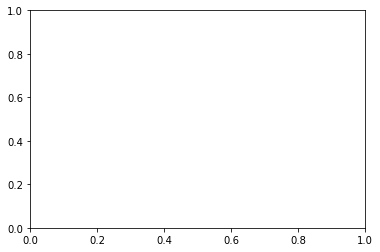

In [88]:
pointtwo_index = int(0.2/dt)
pointfour_index = int(0.4/dt)
pointsix_index = int(0.6/dt)
pointeight_index = int(0.8/dt)
onesec_index = int(1/dt)

plt.plot(x,T[:,pointtwo_index],'r',label='0.2s')
plt.plot(x,T[:,pointfour_index],'g',label='0.4s')
plt.plot(x,T[:,pointsix_index],'b',label='0.6s')
plt.plot(x,T[:,pointeight_index],'k',label='0.8s')
plt.plot(x,T[:,onesec_index],'m',label='1s')
plt.legend()
plt.title('solutions with $\Delta$t = 0.00354s')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(g) Finally, comment on your plot from 1(f) and $r$ value calculated from 1(e). [1 pts]

Question 2. Crank-Nicolson method. We'll use the Crank-Nicolson to solve the problem in Question 1. [41 pts]

(a) Recall that the 1D heat equation is approximated as
$$\frac{T_i^{n+1} - T_i^n}{\Delta t} = \frac{D}{2}\frac{(T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}) + (T_{i+1}^{n} - 2T_i^{n} + T_{i-1}^{n})}{\Delta x^2}$$

so the future values can be calculated from $$T_i^{n+1} - \alpha(T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}) = \alpha(T_{i+1}^{n} - 2T_i^{n} + T_{i-1}^{n})$$
where $\alpha = \frac{D\Delta t}{2\Delta x^2}$. Since all of the constants are defined in 1(b) and $x$ and $t$ are initialized in 1(c), define $\alpha$. [1 pts]

In [32]:
alpha = D*dt/2/dx/dx

(b) Recall that the equation in 2(a) can be reconstructed to a linear algebra problem $A\mathbf{x} = \mathbf{b}$ of the form below:
$$
\begin{bmatrix}
1+2\alpha & -\alpha & 0 &  & \ldots && \\
-\alpha & 1+2\alpha & -\alpha &  & \ldots & &\\
0 & -\alpha & 1+2\alpha &  & \ldots & &\\
 & & &  & 1+2\alpha & -\alpha & 0\\
 & & & & -\alpha & 1+2\alpha & \alpha\\
  & & & &  0 & -\alpha & 1+2\alpha\\
\end{bmatrix}
\begin{bmatrix}
T_i^{n+1}\\
T_2^{n+1}\\
\vdots\\
T_{M-2}^{n+1}\\
T_{M-1}^{n+1}
\end{bmatrix}
=
\begin{bmatrix}
\alpha T_0^n + (1-2\alpha) T_1^n + \alpha T_2^n + \alpha T_0^{n+1}\\
\alpha T_1^n + (1-2\alpha) T_2^n + \alpha T_3^n\\
\vdots\\
\alpha T_{M-3}^n + (1-2\alpha) T_{M-2}^n + \alpha T_{M-1}^n\\
\alpha T_{M-2}^n + (1-2\alpha) T_{M-1}^n + \alpha T_M^n + \alpha T_M^{n+1}
\end{bmatrix}$$
Construct the tridiagonal matrix $A$ that has $1+2\alpha$ as diagonal entries and $-\alpha$ as off-diagonal entries. [4 pts]



In [52]:
alpha = D * dt / (2 * dx**2)
A = np.eye(len_x - 2, len_x - 2) * (1 + 2 * alpha)
for i in range(len_x - 3):
    A[i, i + 1] = -alpha
    A[i + 1, i] = -alpha
print(A)

[[ 3.832 -1.416  0.    ...  0.     0.     0.   ]
 [-1.416  3.832 -1.416 ...  0.     0.     0.   ]
 [ 0.    -1.416  3.832 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  3.832 -1.416  0.   ]
 [ 0.     0.     0.    ... -1.416  3.832 -1.416]
 [ 0.     0.     0.    ...  0.    -1.416  3.832]]


(c) Again, initialize the $T$ matrix that will store the solutions with the $\textbf{first dimension for $t$ and second dimension for $x$}$ and put the appropriate initial condition values (i.e., $T(x,0)$) and boundary condition values (i.e., $T(0,t)$, $T(L,t)$) to $T$. [4 pts]

In [38]:
T = np.zeros((len_x, len_t))
T[:, 0] = Tx
T[0, :] = t0 
T[-1, :] = t1

(d) Now, construct the very first (i.e., when $n = 0$) right hand side column vector $b$. [3 pts]

In [ ]:
b = alpha * T[:-2, 0] + (1 - 2*alpha) * T[1:-1, 0] + alpha * T[2:, 0]
b[0] += alpha * t0
b[-1] += alpha * t1

(e) Solve the linear algebra problem $Ax=b$ with np.linalg.solve with $A$ from 2(b) and $b$ from 1(d). Then fill in $T$ at the appropriate indices with the solution $x$ from the linear algebra problem. [2 pts]

In [55]:
sol = np.linalg.solve(A, b)
T[1:-1, 1] = sol

(f) Use for loops to calculate all of the solutions or fill in the rest of $T$. [7 pts]

In [60]:
for n in range(2, len_t):

    b[0] = alpha*t0 + alpha*t0 + (1 - 2*alpha)*sol[0] + alpha*sol[1]
    b[-1] = alpha*t1 + alpha*t1 + alpha*sol[-2] + (1-2*alpha)*sol[-1]

    for i in range(1, len(b)-1):
        #b[i] = alpha*sol[i-1] + (1-2*alpha)*sol[i] + alpha*sol[i+1]
    sol = np.linalg.solve(A, b)
    T[1:-1, n] = sol

(g) Plot your results at 0.2, 0.4, 0.6, 0.8, and 1 s in one single plot. Make sure to put labels for each result, legend, title, $x$-axis label, and $y$-axis label for your plot. [19 pts]

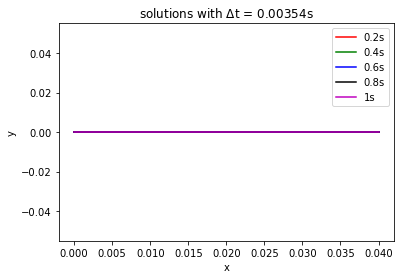

In [61]:
pointtwo_index = int(0.2/dt)
pointfour_index = int(0.4/dt)
pointsix_index = int(0.6/dt)
pointeight_index = int(0.8/dt)
onesec_index = int(1/dt)

plt.plot(x,T[:,pointtwo_index],'r',label='0.2s')
plt.plot(x,T[:,pointfour_index],'g',label='0.4s')
plt.plot(x,T[:,pointsix_index],'b',label='0.6s')
plt.plot(x,T[:,pointeight_index],'k',label='0.8s')
plt.plot(x,T[:,onesec_index],'m',label='1s')
plt.legend()
plt.title('solutions with $\Delta$t = 0.00354s')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(h) What is the difference between the plot from 2(g) and the plot from 1(f)? Why? [1 pts]

Question 3. Waves, discrete Fourier transform (DFT), and fast Fourier transform (FFT). [27 pts]

(a) Generate a signal that is a sum of one sine wave with a frequency of 2 Hz, an amplitude of 5, and a phase shift of 2, and another sine wave with a frequency of 4 Hz, an amplitude of 10, and a phase shift of -2. Let the sampling rate be 100 Hz. Plot the signal for 2 seconds. Remember to include a title, $x$-axis label, and $y$-axis label for the plot. [9 pts]

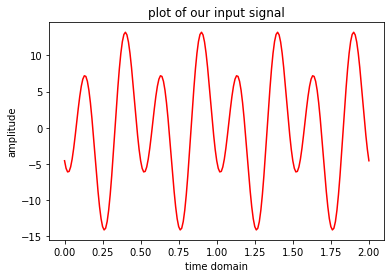

In [74]:
sr = 100
ts = 1.0/sr

t = np.arange(0,2+ts,ts)

x = 5*np.sin(2*np.pi*2*t+2)
x += 10*np.sin(2*np.pi*4*t-2)


plt.plot(t,x,'r')
plt.xlabel('time domain')
plt.ylabel('amplitude')
plt.title('plot of our input signal')
plt.show()

(b) Use scipy.fftpack.fft to calculate the FFT of the signal in 3(a). Plot the $\textbf{first half of the normalized FFT spectrum}$ and include a title, $x$-axis label, and $y$-axis label for the plot. Make sure to have no markers and only lines show in the plot (i.e., markerfmt=" ") and make the spectrum lines and the base line have the same color. Do not worry if you see warning messages, which may appear depending on your matplotlib version. The plot should also show the $x$-axis part from 0 to 10 freq (Hz). Finally, use %timeit to measure the time it took to execute scipy.fftpack.fft for the signal in 3(a). [18 pts]

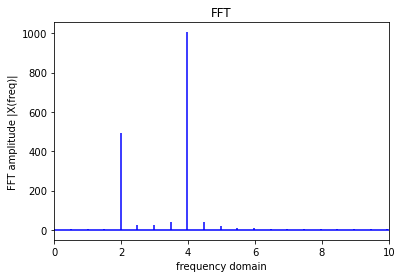

14.4 µs ± 676 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [79]:
sr = 100
X = fft(x)
N = len(X)
n = np.arange(N)
ts_freq = N/sr
freq = n/ts_freq

plt.xlim(0,10)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="b", use_line_collection=True)
plt.xlabel('frequency domain')
plt.ylabel('FFT amplitude |X(freq)|')
plt.title('FFT')
plt.show()
%timeit fft(x)

Rough cells (won't be graded or looked at)